In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from matplotlib.gridspec import GridSpec 
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import block_diag
%config InlineBackend.figure_format = 'retina'
import pandas as pd

## Regression Analysis

In [2]:
X = np.random.rand(50,1)

In [3]:
noise = np.random.rand(50,1)

In [4]:
y = 2*X + 5 + noise

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

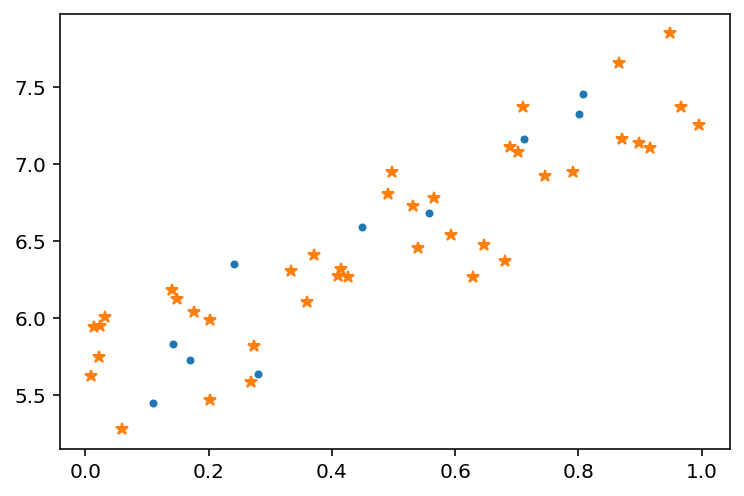

In [6]:
plt.plot(X_train, y_train,'.')
plt.plot(X_test, y_test, '*')

### Linear Regression

In [7]:
model1 = LinearRegression().fit(X_train, y_train)

In [8]:
predictions1 = model1.predict(X_train)

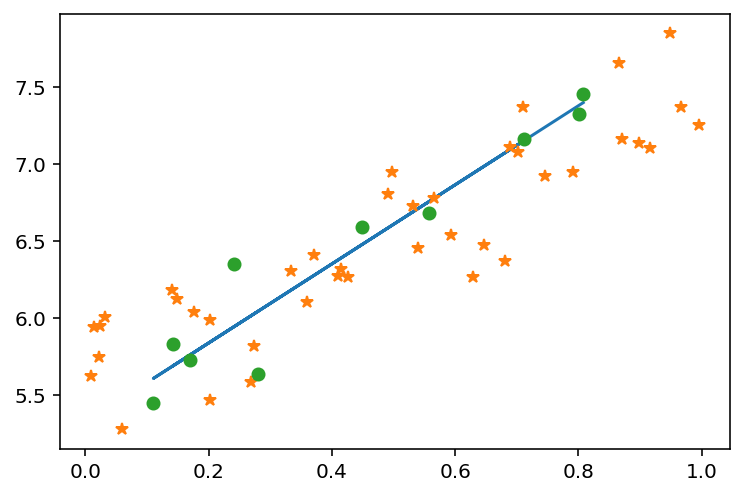

In [9]:
plt.plot(X_train,predictions1)
plt.plot(X_test,y_test,'*')
plt.plot(X_train,y_train,'o')
plt.show()

### Ridge Regression

In [10]:
model2 = Ridge().fit(X_train,y_train)

In [11]:
predictions2 = model2.predict(X_train)

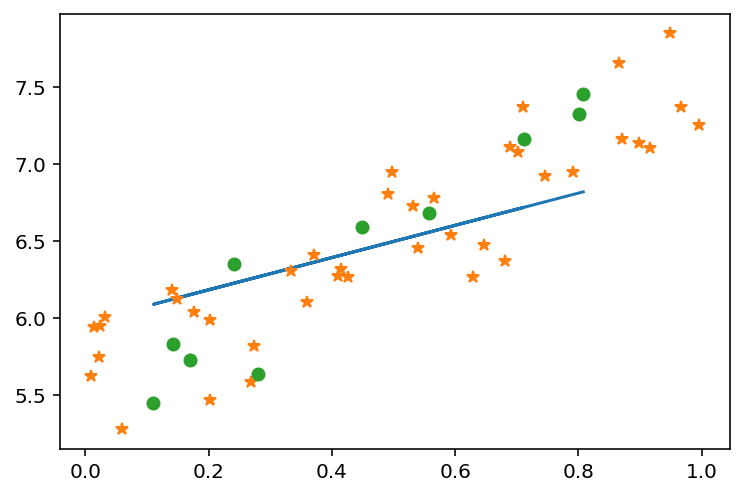

In [12]:
plt.plot(X_train,predictions2)
plt.plot(X_test,y_test,'*')
plt.plot(X_train,y_train,'o')
plt.show()

### LASSO Regression

In [13]:
model3 = Lasso(alpha=0.02).fit(X_train,y_train)

In [14]:
predictions3 = model3.predict(X_train)

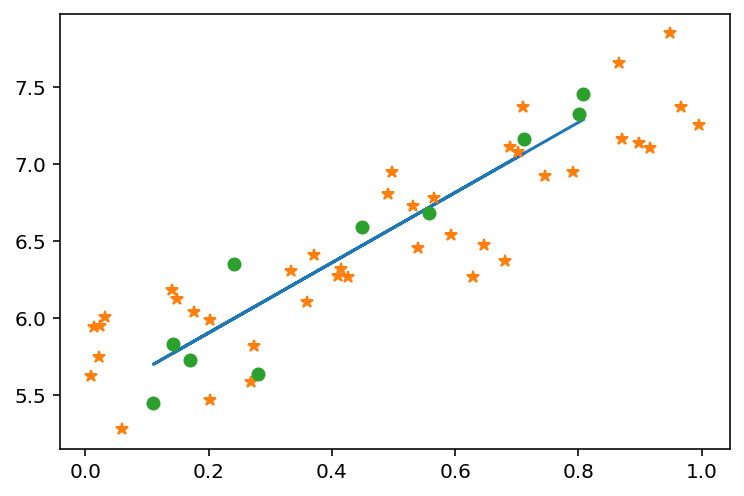

In [15]:
plt.plot(X_train,predictions3)
plt.plot(X_test,y_test,'*')
plt.plot(X_train,y_train,'o')
plt.show()

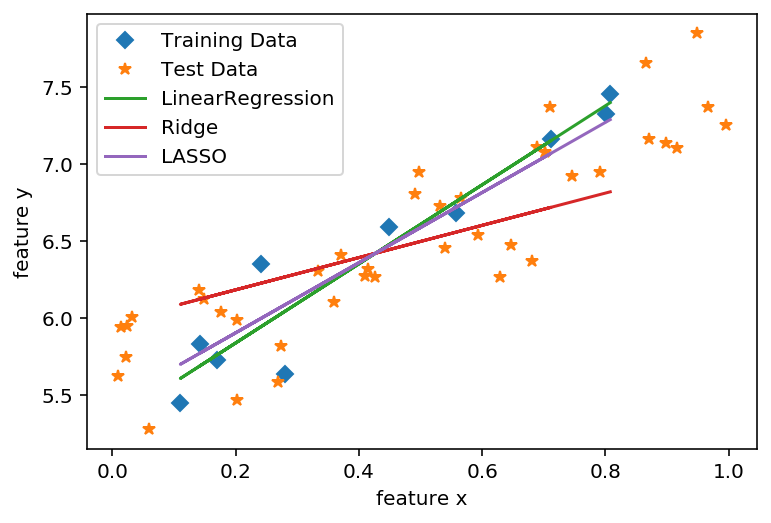

In [16]:
plt.plot(X_train, y_train, 'D', label='Training Data')
plt.plot(X_test, y_test, '*', label='Test Data')
plt.plot(X_train, predictions1, label='LinearRegression')
plt.plot(X_train, predictions2, label='Ridge')
plt.plot(X_train, predictions3, label='LASSO')
plt.xlabel('feature x')
plt.ylabel('feature y')
plt.legend()
plt.show()

# SINDY 

In [17]:
from scipy.integrate import odeint
from scipy.integrate import solve_ivp 

## Lorenz 
def Lorenz(x0, sigma, rho, beta, t):
    def dynamical_system(y,t):
        dy = np.zeros_like(y)
        dy[0] = sigma*(y[1]-y[0])
        dy[1] = y[0]*(rho-y[2]) - y[1]
        dy[2] = y[0]*y[1] - beta*y[2]
        return dy
    x = odeint(dynamical_system, x0, t, rtol=1e-12, atol=1e-12)
    #x = solve_ivp(dynamical_system, t_span=t, y0=x0, rtol=1e-12, atol=1e-12, vectorized=True)
    dt = t[1] - t[0]
    xdot = np.gradient(x, dt, axis=0)
    return x, xdot

In [18]:
#chaotic parameters
sigma, rho, beta = 10., 28., 8./3.

In [19]:
#t = np. linspace(0, 20, 2000)
t = np.linspace(0.001, 100, 100000)
x0 = np.array([-8., 7., 27.])
x, dx = Lorenz(x0, sigma, rho, beta, t)

Text(0.5, 0, 'z')

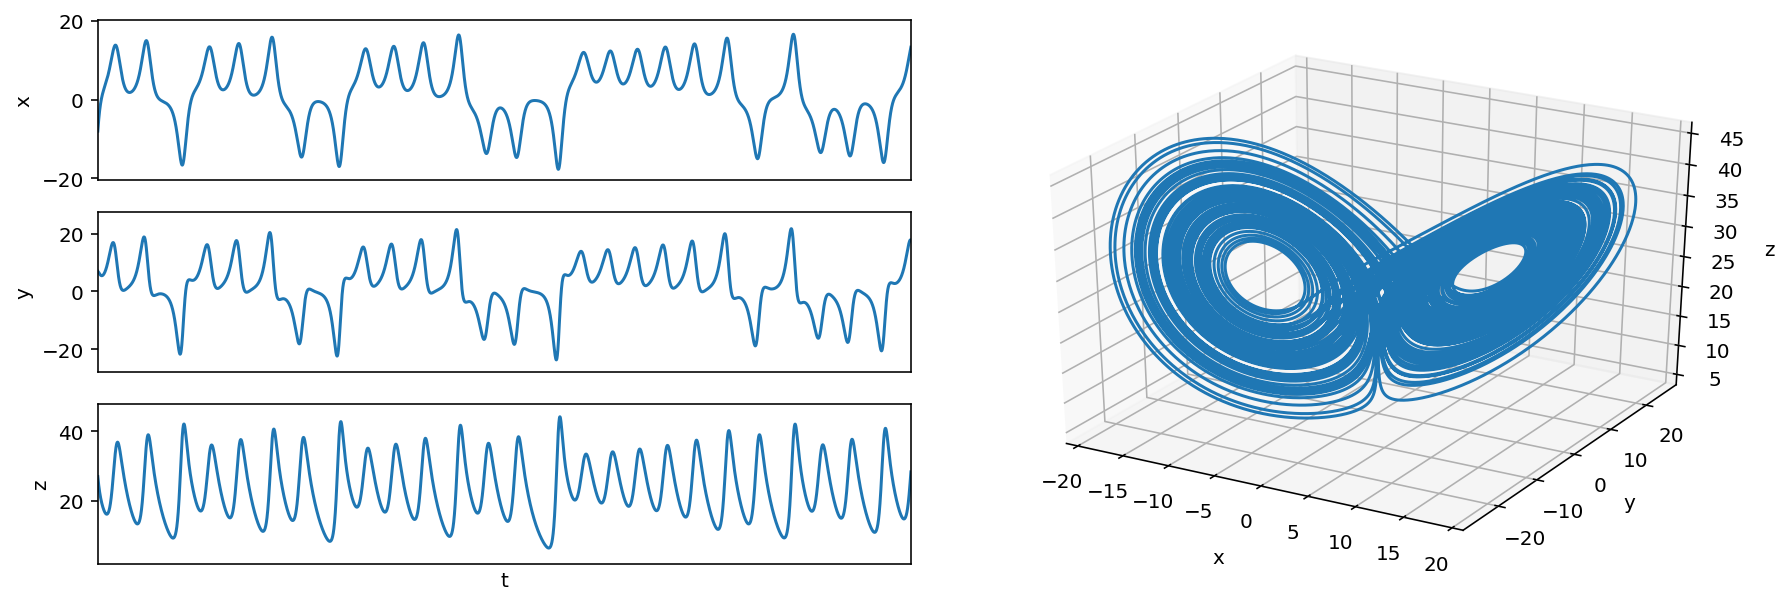

In [20]:
w = 10
fig = plt.figure(figsize=(1.5*w, w/2))
gs = GridSpec(3, 6)

ax0 = fig.add_subplot(gs[0, :3])
ax0.plot(t, x[:, 0])
ax0.set_ylabel('x')
ax0.set_xticks([])
ax0.set_xlim(0, 20)

ax1 = fig.add_subplot(gs[1, :3])
ax1.plot(t, x[:, 1])
ax1.set_ylabel('y')
ax1.set_xticks([])
ax1.set_xlim(0, 20)

ax2 = fig.add_subplot(gs[2, :3])
ax2.plot(t, x[:, 2])
ax2.set_ylabel('z')
ax2.set_xlabel('t')
ax2.set_xticks([])
ax2.set_xlim(0, 20)

ax3 = fig.add_subplot(gs[:, 3:], projection='3d')
ax3.plot(x[:, 0], x[:, 1], x[:, 2])
ax3.set_xlabel('x', labelpad=10)
ax3.set_ylabel('y')
ax3.set_zlabel('z')

In [21]:
# Non-linear function library
library = PolynomialFeatures(degree=5, include_bias=True)
# include_bias parameter is for the feature in which all polynomial powers are zero - column of ones
Theta = library.fit_transform(x)
n_lib = library.n_output_features_

In [22]:
feature_library = pd.DataFrame(data=Theta, columns=library.get_feature_names())

In [23]:
feature_library.head()

,1,x0,x1,x2,x0^2,x0 x1,x0 x2,x1^2,x1 x2,x2^2,...,x0 x1^3 x2,x0 x1^2 x2^2,x0 x1 x2^3,x0 x2^4,x1^5,x1^4 x2,x1^3 x2^2,x1^2 x2^3,x1 x2^4,x2^5
0,1.0,-8.000000,7.000000,27.000000,64.000000,-56.000000,-216.000000,49.000000,189.000000,729.000000,...,-74088.000000,-285768.000000,-1.102248e+06,-4.251528e+06,16807.000000,64827.000000,250047.000000,964467.000000,3.720087e+06,1.434891e+07
1,1.0,-7.850824,6.984579,26.872753,61.635432,-54.834696,-210.973249,48.784340,187.694862,722.144877,...,-71886.616018,-276579.502446,-1.064123e+06,-4.094151e+06,16622.681478,63954.783618,246062.246519,946709.936878,3.642410e+06,1.401396e+07
2,1.0,-7.703289,6.968347,26.747005,59.340664,-53.679194,-206.039912,48.557864,186.382418,715.402258,...,-69717.325352,-267599.984039,-1.027144e+06,-3.942546e+06,16430.430310,63065.857252,242069.274874,929148.296572,3.566403e+06,1.368913e+07
3,1.0,-7.557388,6.951353,26.622740,57.114114,-52.534074,-201.198373,48.321312,185.064068,708.770263,...,-67582.234192,-258830.784772,-9.912868e+05,-3.796494e+06,16231.056857,62162.744903,238074.876325,911794.465082,3.492049e+06,1.337407e+07
4,1.0,-7.413111,6.933643,26.499944,54.954220,-51.399866,-196.447032,48.075402,183.741142,702.247012,...,-65483.194292,-250272.622768,-9.565261e+05,-3.655782e+06,16025.342006,61247.842565,234085.376612,894659.489201,3.419332e+06,1.306847e+07


### The ordinary least squares solution

In [24]:
%%time
x_lstsq, residuals, rank, s = np.linalg.lstsq(Theta, dx, rcond=None)
print('Total number of possible coefficients:', x_lstsq.size)
print('Number of non-zero coefficients:', np.count_nonzero(x_lstsq))

Total number of possible coefficients: 168
Number of non-zero coefficients: 168
CPU times: user 299 ms, sys: 44.9 ms, total: 344 ms
Wall time: 93.5 ms


#### All of the coefficients are non-zero, this indicates overfitting.

In [25]:
x_lssq = pd.DataFrame(data=x_lstsq, columns=('x0','x1','x2'), index=library.get_feature_names())

In [26]:
x_lssq.head()

,x0,x1,x2
1,-0.002580,-0.001293,0.002119
x0,-9.951847,28.027714,-0.046209
x1,9.976071,-1.013456,0.022980
x2,0.000985,0.000489,-2.667459
x0^2,-0.005468,-0.002829,0.004764


### Lasso solution - $l_{1}$ penalized least squares

In [27]:
%%time
lasso_fit = Lasso(alpha=0.025).fit(Theta, dx)
print('Total number of possible coefficients:', lasso_fit.coef_.size)
print('Number of non-zero coefficients:', np.count_nonzero(lasso_fit.coef_))

/Users/irem/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47678.81406525253, tolerance: 17896.70868084164
  model = cd_fast.enet_coordinate_descent(
/Users/irem/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99293.62465268334, tolerance: 41739.06593783685
  model = cd_fast.enet_coordinate_descent(


Total number of possible coefficients: 168
Number of non-zero coefficients: 164
CPU times: user 28.2 s, sys: 1.39 s, total: 29.6 s
Wall time: 7.14 s


In [28]:
x_lasso = pd.DataFrame(data=lasso_fit.coef_.T, columns=('x0','x1','x2'), index=library.get_feature_names())

In [29]:
x_lasso.head()

,x0,x1,x2
1,0.000000,0.000000,0.000000
x0,-5.308838,18.639762,0.040519
x1,7.427877,2.704505,0.000000
x2,-0.003214,0.049408,-1.715261
x0^2,0.005514,-0.048742,0.461622


### Hard - tresholded sequential least squares solution

In [30]:
%time
x_new, residuals, rank, s = np.linalg.lstsq(Theta, dx, rcond=None)
treshold = 0.025
for k in range(10):
    x_new, residuals, rank, s = np.linalg.lstsq(Theta, dx, rcond=None) 
    x_new[np.abs(x_new) < treshold] = 0

CPU times: user 5 µs, sys: 13 µs, total: 18 µs
Wall time: 9.06 µs


#### As stated in the paper, sequential-thresholded solution is 10^6 times faster than Lasso solution.

In [31]:
x_ht = pd.DataFrame(data=x_new, columns=('x0','x1','x2'), index=library.get_feature_names())
print('Total number of possible coefficients:', x_new.size)
print('Number of non-zero coefficients:', np.count_nonzero(x_new))

Total number of possible coefficients: 168
Number of non-zero coefficients: 8


In [32]:
x_ht.head()

,x0,x1,x2
1,0.000000,0.000000,0.000000
x0,-9.951847,28.027714,-0.046209
x1,9.976071,-1.013456,0.000000
x2,0.000000,0.000000,-2.667459
x0^2,0.000000,0.000000,0.000000


### Ridge Solution

In [33]:
%%time
ridge_fit = Ridge().fit(Theta, dx)
print('Total number of possible coefficients:', ridge_fit.coef_.size)
print('Number of non-zero coefficients:', np.count_nonzero(ridge_fit.coef_))

Total number of possible coefficients: 168
Number of non-zero coefficients: 165
CPU times: user 179 ms, sys: 16.2 ms, total: 195 ms
Wall time: 49.5 ms


/Users/irem/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.07094e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [34]:
x_ridge = pd.DataFrame(data=ridge_fit.coef_.T, columns=('x0','x1','x2'), index=library.get_feature_names())

In [35]:
x_ridge.head()

,x0,x1,x2
1,0.000000,0.000000,0.000000
x0,-0.409027,9.238518,0.005779
x1,5.568929,7.645705,-0.003525
x2,0.093545,-0.160665,-2.551583
x0^2,-0.020096,0.019853,0.092987


### Comparison between different identifications

In [36]:
def sindy_model(x,t,library,coeffs):
    dxdt = np.zeros_like(x)
    library = PolynomialFeatures(degree=5, include_bias=True)
    Theta = library.fit_transform(x.reshape(1,-1))
    dx = np.dot(Theta, coeffs)
    return dx.flatten()

In [37]:
x_least = odeint(sindy_model, x0, t, args=(library, x_lstsq))
x_lasso = odeint(sindy_model, x0, t, args=(library, lasso_fit.coef_.T))
x_ridge = odeint(sindy_model, x0, t, args=(library, ridge_fit.coef_.T))
x_hst = odeint(sindy_model, x0, t, args=(library, x_new))

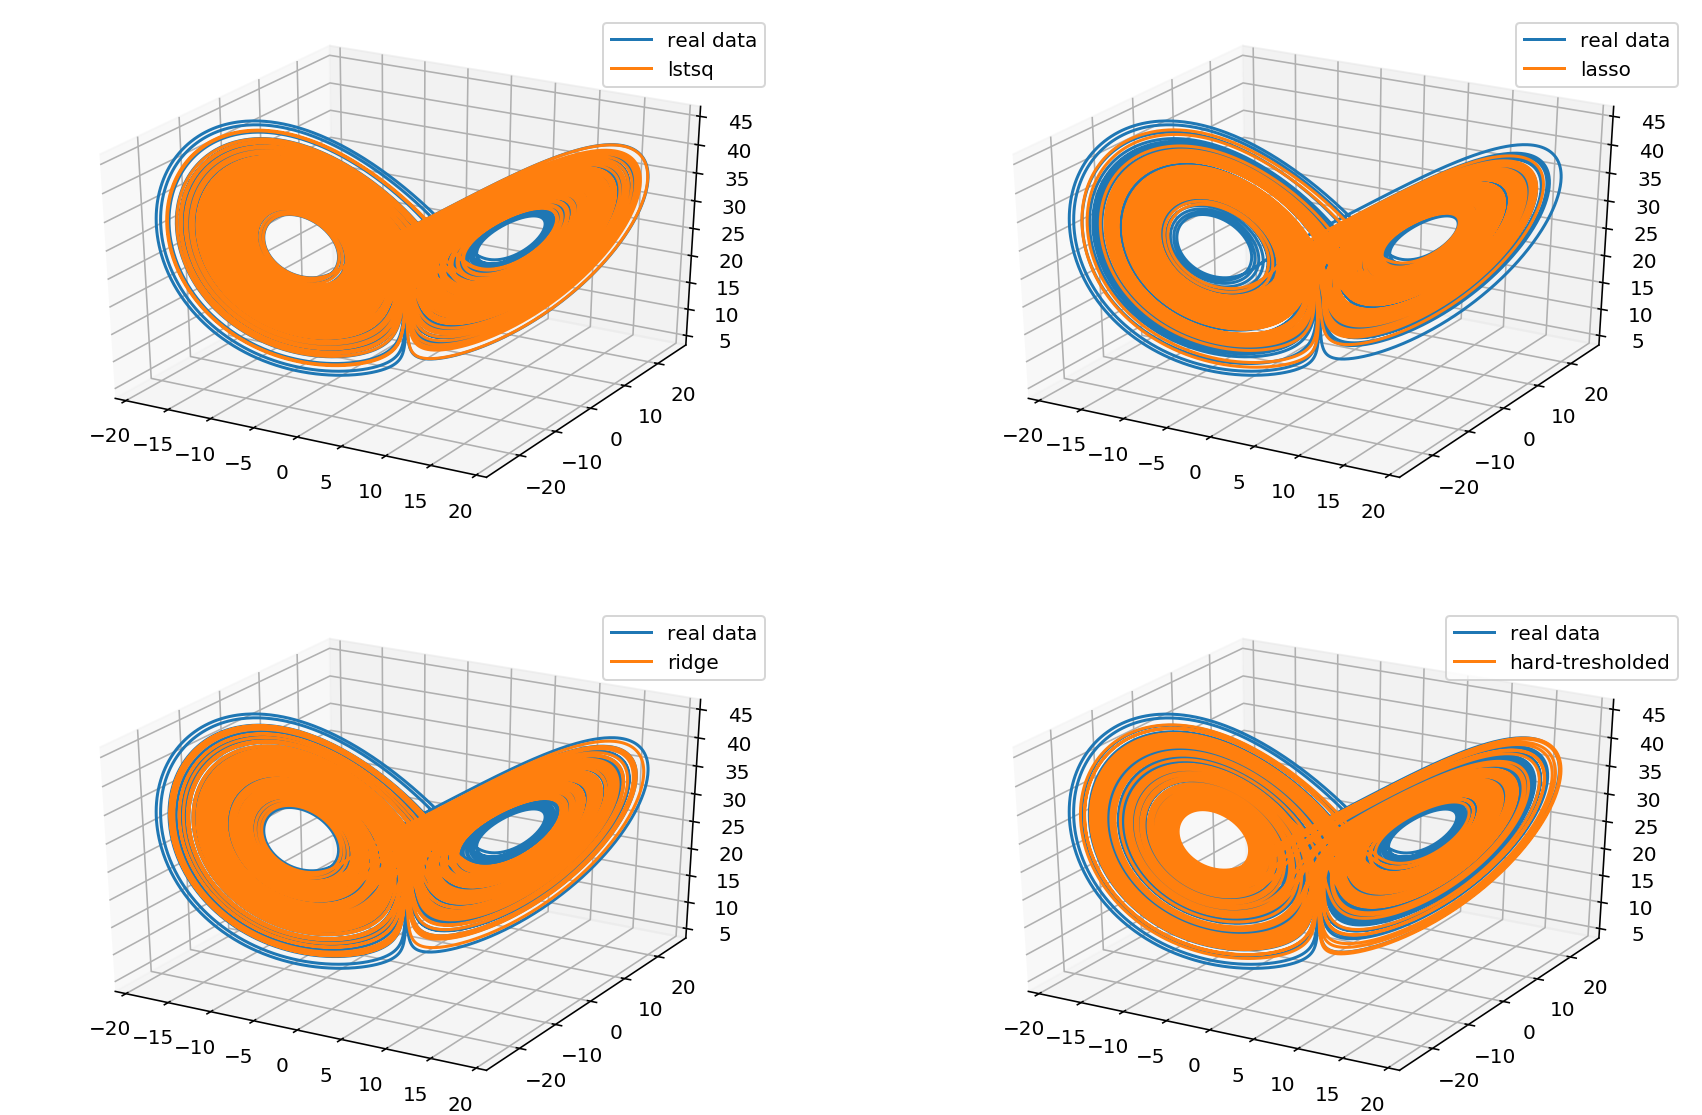

In [38]:
fig = plt.figure(figsize=(1.5*w,w))
gs = GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = fig.add_subplot(gs[0,0], projection='3d')
ax1.plot(x[:,0],x[:,1],x[:,2], label='real data') #gt
ax1.plot(x_least[:,0], x_least[:,1], x_least[:,2], label='lstsq') #leastsq
plt.legend()

ax2 = fig.add_subplot(gs[0,1], projection='3d')
ax2.plot(x[:,0],x[:,1],x[:,2], label='real data') #gt
ax2.plot(x_lasso[:,0], x_lasso[:, 1], x_lasso[:,2], label='lasso') #lasso
plt.legend()

ax3 = fig.add_subplot(gs[1,0], projection='3d')
ax3.plot(x[:,0],x[:,1],x[:,2], label='real data') #gt
ax3.plot(x_ridge[:,0], x_ridge[:, 1], x_ridge[:,2], label='ridge') #ridge
plt.legend()

ax4 = fig.add_subplot(gs[1,1], projection='3d')
ax4.plot(x[:,0],x[:,1],x[:,2], label='real data') #gt
ax4.plot(x_hst[:,0], x_hst[:,1], x_hst[:,2], label='hard-tresholded') #hard-tresholded
plt.legend()